In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import itertools


In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/gk_items.csv')
df

,Progress,UserLanguage,Collection,LE3.199,LE3.200,LE3.201,LE5.012,LE5.013,LE5.014,LE5.015,...,LE5.022,LE5.023,LE5.024,LE5.025,LE5.026,LE5.027,LE5.028,LE5.029,LE5.030,LE5.031
0,100,RU,Pilot,Strongly disagree,Strongly disagree,Strongly disagree,All the genes in DNA,,,99.90%,...,Many genes,Points of genetic variation,More than 90% the same,Is removed when passed from parent to offspring,No,CRISPR,No,TRUE,TRUE,There is an approximately 30% chance that some...
1,100,RU,Pilot,Agree,Strongly agree,Agree,The entire sequence of an individual's DNA,GCTA,,75%,...,,,,,Yes,,No,,,If someone has insomnia this is approximately ...
2,100,RU,Pilot,,,,,,,,...,,,,,,,,,,
3,100,RU,Pilot,,,,All the genes in DNA,GCTA,2 copies,99.90%,...,Many genes,Points of genetic variation,100% identical,Does not lead to the production of proteins,No,CRISPR,No,TRUE,TRUE,If someone has insomnia this is approximately ...
4,4,RU,Pilot,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,37,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,
1913,12,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,
1914,19,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,
1915,37,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,


In [3]:
###created a column called count 
df['count'] = 1
df

,Progress,UserLanguage,Collection,LE3.199,LE3.200,LE3.201,LE5.012,LE5.013,LE5.014,LE5.015,...,LE5.023,LE5.024,LE5.025,LE5.026,LE5.027,LE5.028,LE5.029,LE5.030,LE5.031,count
0,100,RU,Pilot,Strongly disagree,Strongly disagree,Strongly disagree,All the genes in DNA,,,99.90%,...,Points of genetic variation,More than 90% the same,Is removed when passed from parent to offspring,No,CRISPR,No,TRUE,TRUE,There is an approximately 30% chance that some...,1
1,100,RU,Pilot,Agree,Strongly agree,Agree,The entire sequence of an individual's DNA,GCTA,,75%,...,,,,Yes,,No,,,If someone has insomnia this is approximately ...,1
2,100,RU,Pilot,,,,,,,,...,,,,,,,,,,1
3,100,RU,Pilot,,,,All the genes in DNA,GCTA,2 copies,99.90%,...,Points of genetic variation,100% identical,Does not lead to the production of proteins,No,CRISPR,No,TRUE,TRUE,If someone has insomnia this is approximately ...,1
4,4,RU,Pilot,,,,,,,,...,,,,,,,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,37,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,1
1913,12,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,1
1914,19,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,1
1915,37,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,1


In [4]:
###taking variables needed
yes = df[['LE3.199','LE3.200','LE3.201']].copy()
yes

,LE3.199,LE3.200,LE3.201
0,Strongly disagree,Strongly disagree,Strongly disagree
1,Agree,Strongly agree,Agree
2,,,
3,,,
4,,,
...,...,...,...
1912,,,
1913,,,
1914,,,
1915,,,


In [5]:
# replacing empty strings with no responce. 
yes.replace(' ', 'No response', inplace = True)
yes

,LE3.199,LE3.200,LE3.201
0,Strongly disagree,Strongly disagree,Strongly disagree
1,Agree,Strongly agree,Agree
2,No response,No response,No response
3,No response,No response,No response
4,No response,No response,No response
...,...,...,...
1912,No response,No response,No response
1913,No response,No response,No response
1914,No response,No response,No response
1915,No response,No response,No response


In [6]:
# melt: to reshape or transform a dataframe from wide format to long format.
yes_melt = pd.melt(yes)
yes_melt

,variable,value
0,LE3.199,Strongly disagree
1,LE3.199,Agree
2,LE3.199,No response
3,LE3.199,No response
4,LE3.199,No response
...,...,...
5746,LE3.201,No response
5747,LE3.201,No response
5748,LE3.201,No response
5749,LE3.201,No response


In [7]:
yes_melt.columns

Index(['variable', 'value'], dtype='object')

In [10]:
yes_melt.groupby(['variable']).value.count() # groupby single column
yes_next = yes_melt.groupby(['variable']).value.count().reset_index()
yes_next

,variable,value
0,LE3.199,1917
1,LE3.200,1917
2,LE3.201,1917


In [11]:
yes_next_1 = yes_melt.groupby(['variable', 'value'])['value'].count() # double column
yes_next_1

variable  value                     
LE3.199   Agree                         553
          Disagree                       58
          Neither agree nor disagree    133
          No response                   630
          Strongly agree                448
          Strongly disagree              95
LE3.200   Agree                         526
          Disagree                       68
          Neither agree nor disagree    159
          No response                   644
          Strongly agree                435
          Strongly disagree              85
LE3.201   Agree                         557
          Disagree                       52
          Neither agree nor disagree    155
          No response                   653
          Strongly agree                426
          Strongly disagree              74
Name: value, dtype: int64

In [12]:
# Creating a new dataframe
yes_next_1 = pd.DataFrame(yes_next_1)
yes_next_1

value
variable value                            
LE3.199  Agree                         553
         Disagree                       58
         Neither agree nor disagree    133
         No response                   630
         Strongly agree                448
         Strongly disagree              95
LE3.200  Agree                         526
         Disagree                       68
         Neither agree nor disagree    159
         No response                   644
         Strongly agree                435
         Strongly disagree              85
LE3.201  Agree                         557
         Disagree                       52
         Neither agree nor disagree    155
         No response                   653
         Strongly agree                426
         Strongly disagree              74

In [13]:
yes_next_1.columns


Index(['value'], dtype='object')

In [14]:
# index: the labels that identify each row of the dataframe
yes_next_1.index

MultiIndex([('LE3.199',                      'Agree'),
            ('LE3.199',                   'Disagree'),
            ('LE3.199', 'Neither agree nor disagree'),
            ('LE3.199',                'No response'),
            ('LE3.199',             'Strongly agree'),
            ('LE3.199',          'Strongly disagree'),
            ('LE3.200',                      'Agree'),
            ('LE3.200',                   'Disagree'),
            ('LE3.200', 'Neither agree nor disagree'),
            ('LE3.200',                'No response'),
            ('LE3.200',             'Strongly agree'),
            ('LE3.200',          'Strongly disagree'),
            ('LE3.201',                      'Agree'),
            ('LE3.201',                   'Disagree'),
            ('LE3.201', 'Neither agree nor disagree'),
            ('LE3.201',                'No response'),
            ('LE3.201',             'Strongly agree'),
            ('LE3.201',          'Strongly disagree')],
         

In [15]:
yes_next_1['info'] = yes_next_1.index
yes_next_1

value  \
variable value                               
LE3.199  Agree                         553   
         Disagree                       58   
         Neither agree nor disagree    133   
         No response                   630   
         Strongly agree                448   
         Strongly disagree              95   
LE3.200  Agree                         526   
         Disagree                       68   
         Neither agree nor disagree    159   
         No response                   644   
         Strongly agree                435   
         Strongly disagree              85   
LE3.201  Agree                         557   
         Disagree                       52   
         Neither agree nor disagree    155   
         No response                   653   
         Strongly agree                426   
         Strongly disagree              74   

                                                                      info  
variable value                                                              
LE3.199  Agree                                            (LE3.199, Agree)  
         Disagree                                      (LE3.199, Disagree)  
         Neither agree nor disagree  (LE3.199, Neither agree nor disagree)  
         No response                                (LE3.199, No response)  
         Strongly agree                          (LE3.199, Strongly agree)  
         Strongly disagree                    (LE3.199, Strongly disagree)  
LE3.200  Agree                                            (LE3.200, Agree)  
         Disagree                                      (LE3.200, Disagree)  
         Neither agree nor disagree  (LE3.200, Neither agree nor disagree)  
         No response                                (LE3.200, No response)  
         Strongly agree                          (LE3.200, Strongly agree)  
         Strongly disagree                    (LE3.200, Strongly disagree)  
LE3.201  Agree                                            (LE3.201, Agree)  
         Disagree                                      (LE3.201, Disagree)  
         Neither agree nor disagree  (LE3.201, Neither agree nor disagree)  
         No response                                (LE3.201, No response)  
         Strongly agree                          (LE3.201, Strongly agree)  
         Strongly disagree                    (LE3.201, Strongly disagree)

In [17]:
yes_next_2 = pd.merge(yes_next, yes_next_1, on='variable', how='right')
yes_next_2

,variable,value_x,value_y,info
0,LE3.199,1917,553,"(LE3.199, Agree)"
1,LE3.199,1917,58,"(LE3.199, Disagree)"
2,LE3.199,1917,133,"(LE3.199, Neither agree nor disagree)"
3,LE3.199,1917,630,"(LE3.199, No response)"
4,LE3.199,1917,448,"(LE3.199, Strongly agree)"
5,LE3.199,1917,95,"(LE3.199, Strongly disagree)"
6,LE3.200,1917,526,"(LE3.200, Agree)"
7,LE3.200,1917,68,"(LE3.200, Disagree)"
8,LE3.200,1917,159,"(LE3.200, Neither agree nor disagree)"
9,LE3.200,1917,644,"(LE3.200, No response)"


In [20]:
yes_next_2['info'] = yes_next_2['info'].apply(str)

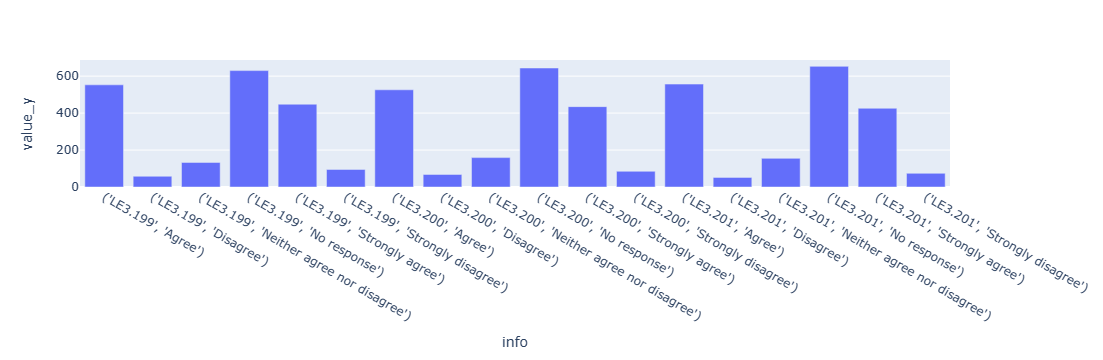

In [29]:
px.bar(yes_next_2, x='info', y= 'value_y')


In [33]:
###finding the percetange 
yes_next_2['%age'] = yes_next_2['value_y']/yes_next_2['value_x']*100
yes_next_2

,variable,value_x,value_y,info,prop,%age
0,LE3.199,1917,553,"('LE3.199', 'Agree')",28.847157,28.847157
1,LE3.199,1917,58,"('LE3.199', 'Disagree')",3.025561,3.025561
2,LE3.199,1917,133,"('LE3.199', 'Neither agree nor disagree')",6.937924,6.937924
3,LE3.199,1917,630,"('LE3.199', 'No response')",32.863850,32.863850
4,LE3.199,1917,448,"('LE3.199', 'Strongly agree')",23.369849,23.369849
5,LE3.199,1917,95,"('LE3.199', 'Strongly disagree')",4.955660,4.955660
6,LE3.200,1917,526,"('LE3.200', 'Agree')",27.438706,27.438706
7,LE3.200,1917,68,"('LE3.200', 'Disagree')",3.547209,3.547209
8,LE3.200,1917,159,"('LE3.200', 'Neither agree nor disagree')",8.294210,8.294210
9,LE3.200,1917,644,"('LE3.200', 'No response')",33.594158,33.594158


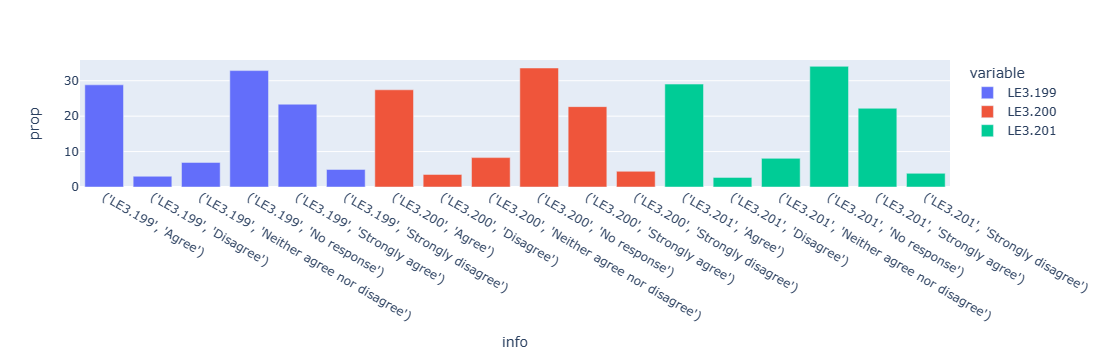

In [34]:
px.bar(yes_next_2, 
       x='info', 
       y= 'prop',
      color='variable')

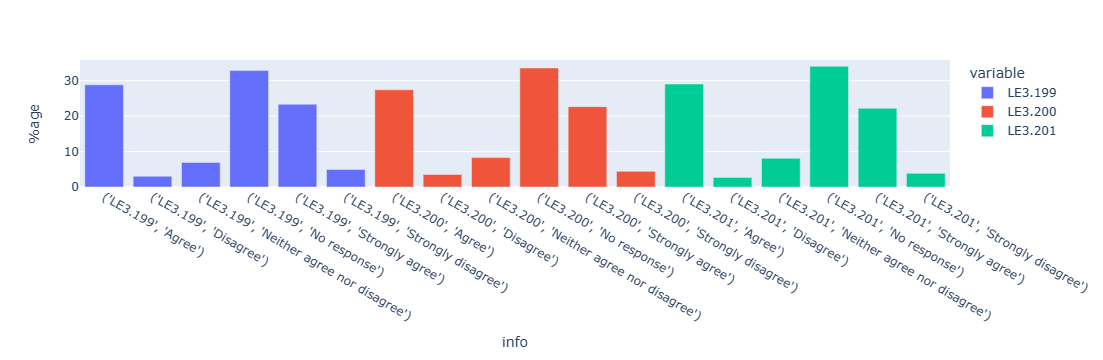

In [35]:
px.bar(yes_next_2, 
       x='info', 
       y= '%age',
      color='variable')

In [36]:
#data cleaning
yes_next_2['info'] = yes_next_2['info'].map(str)
yes_next_2['info'].str.replace('(','')

0                          'LE3.199', 'Agree')
1                       'LE3.199', 'Disagree')
2     'LE3.199', 'Neither agree nor disagree')
3                    'LE3.199', 'No response')
4                 'LE3.199', 'Strongly agree')
5              'LE3.199', 'Strongly disagree')
6                          'LE3.200', 'Agree')
7                       'LE3.200', 'Disagree')
8     'LE3.200', 'Neither agree nor disagree')
9                    'LE3.200', 'No response')
10                'LE3.200', 'Strongly agree')
11             'LE3.200', 'Strongly disagree')
12                         'LE3.201', 'Agree')
13                      'LE3.201', 'Disagree')
14    'LE3.201', 'Neither agree nor disagree')
15                   'LE3.201', 'No response')
16                'LE3.201', 'Strongly agree')
17             'LE3.201', 'Strongly disagree')
Name: info, dtype: object

In [38]:
yes_next_2['info'] = yes_next_2['info'].str.replace('(','')
yes_next_2['info'] = yes_next_2['info'].str.replace(')','')
yes_next_2

,variable,value_x,value_y,info,prop,%age
0,LE3.199,1917,553,"'LE3.199', 'Agree'",28.847157,28.847157
1,LE3.199,1917,58,"'LE3.199', 'Disagree'",3.025561,3.025561
2,LE3.199,1917,133,"'LE3.199', 'Neither agree nor disagree'",6.937924,6.937924
3,LE3.199,1917,630,"'LE3.199', 'No response'",32.863850,32.863850
4,LE3.199,1917,448,"'LE3.199', 'Strongly agree'",23.369849,23.369849
5,LE3.199,1917,95,"'LE3.199', 'Strongly disagree'",4.955660,4.955660
6,LE3.200,1917,526,"'LE3.200', 'Agree'",27.438706,27.438706
7,LE3.200,1917,68,"'LE3.200', 'Disagree'",3.547209,3.547209
8,LE3.200,1917,159,"'LE3.200', 'Neither agree nor disagree'",8.294210,8.294210
9,LE3.200,1917,644,"'LE3.200', 'No response'",33.594158,33.594158


In [39]:
yes_next_2 ['info'].str.split(',')

0                          ['LE3.199',  'Agree']
1                       ['LE3.199',  'Disagree']
2     ['LE3.199',  'Neither agree nor disagree']
3                    ['LE3.199',  'No response']
4                 ['LE3.199',  'Strongly agree']
5              ['LE3.199',  'Strongly disagree']
6                          ['LE3.200',  'Agree']
7                       ['LE3.200',  'Disagree']
8     ['LE3.200',  'Neither agree nor disagree']
9                    ['LE3.200',  'No response']
10                ['LE3.200',  'Strongly agree']
11             ['LE3.200',  'Strongly disagree']
12                         ['LE3.201',  'Agree']
13                      ['LE3.201',  'Disagree']
14    ['LE3.201',  'Neither agree nor disagree']
15                   ['LE3.201',  'No response']
16                ['LE3.201',  'Strongly agree']
17             ['LE3.201',  'Strongly disagree']
Name: info, dtype: object

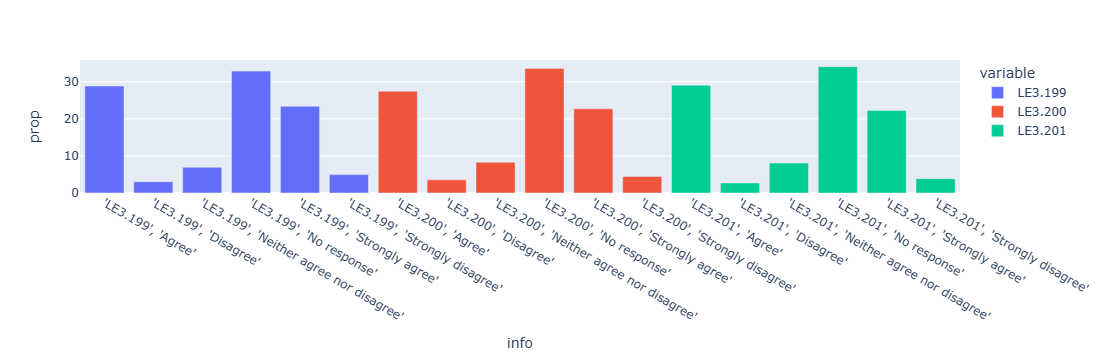

In [40]:
#plot
px.bar(yes_next_2, 
       x='info', 
       y= 'prop',
      color='variable')

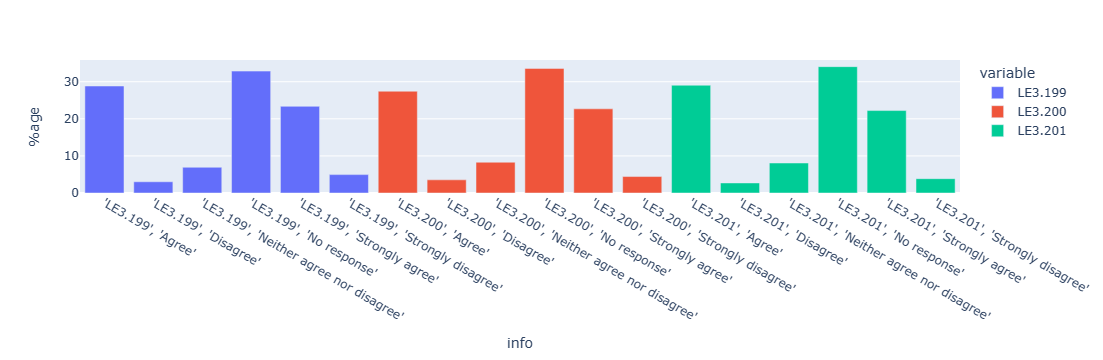

In [41]:
#plot
px.bar(yes_next_2, 
       x='info', 
       y= '%age',
      color='variable')